# Install modules if not already installed
## Delete hashtag behind module that isn't installed

# Change the number of rows and columns to display

In [1]:
# !pip install matplotlib
# !pip install numpy
# !pip install pandas
# !pip install statsmodels
# !pip install sklearn

# Import modules

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import r2_score
from pathlib import Path

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.precision', 4)

# Define a path for import and export
### don't forget to double the slashes
#### I'd fix it but the solution is more annoying than the problem

In [4]:
path = '/Users/admin/fin427/module2/excelSheets/'

# Import monthly returns data

In [5]:
df_returns = pd.read_excel(path + 'Excel02 Invesco MidCap Quality 20230104.xlsx', 
sheet_name='MthData')
print(df_returns.head())
df_returns = df_returns.dropna()
print(df_returns.head())

   DateLabel      Month  InvescoMidQual   SP400  MSCIMid  InvescoMidQualRet  \
0    2006.11 2006-11-30          1.0000  1.0000   1.0000                NaN   
1    2006.12 2006-12-31          1.0252  0.9939   0.9990             0.0252   
2    2007.01 2007-01-31          1.0531  1.0293   1.0355             0.0272   
3    2007.02 2007-02-28          1.0631  1.0356   1.0360             0.0095   
4    2007.03 2007-03-31          1.0763  1.0484   1.0450             0.0124   

   SP400Ret  MSCIMidRet  InvescoMidQualLnRet  SP400LnRet  MSCIMidLnRet  \
0       NaN         NaN                  NaN         NaN           NaN   
1   -0.0061     -0.0010               0.0249     -0.0061       -0.0010   
2    0.0356      0.0366               0.0269      0.0350        0.0359   
3    0.0061      0.0005               0.0094      0.0061        0.0005   
4    0.0124      0.0087               0.0123      0.0123        0.0086   

   TBillMth  InvescoMidQualExRet  SP400ExRet  MSCIMidExRet  
0       NaN        

# Regression of Invesco excess returns on S&P 400 excess returns

In [6]:
y = df_returns['InvescoMidQualExRet']
x = df_returns[['SP400ExRet']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)
print(predictions)

                             OLS Regression Results                            
Dep. Variable:     InvescoMidQualExRet   R-squared:                       0.940
Model:                             OLS   Adj. R-squared:                  0.940
Method:                  Least Squares   F-statistic:                     2995.
Date:                 Wed, 18 Jan 2023   Prob (F-statistic):          1.14e-118
Time:                         15:22:34   Log-Likelihood:                 570.21
No. Observations:                  193   AIC:                            -1136.
Df Residuals:                      191   BIC:                            -1130.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      0.99

# Regression using polyfit

In [7]:
x1 = df_returns.SP400ExRet
y1 = df_returns.InvescoMidQualExRet
m, b = np.polyfit(x1, y1, 1)
print("Slope: " + str(round(m, 3)))
print("Coefficient: " + str(round(b, 6)))

Slope: 0.919
Coefficient: 0.000917


# Generate and save plot

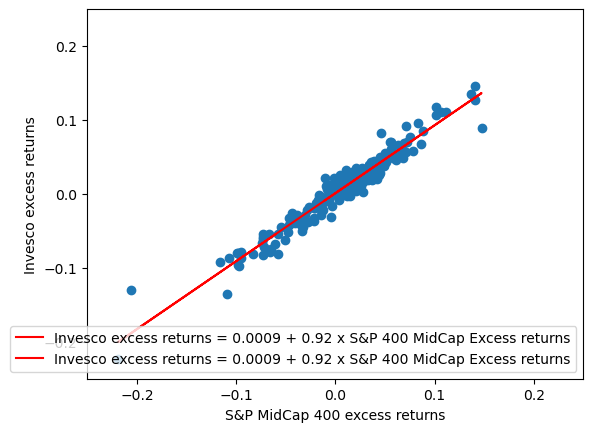

In [11]:
plt.plot(x1, y1, 'o')
plt.plot(x, m * x + b, 'red', label='Invesco excess returns = {:.4f} + {:.2f} x S&P \
400 MidCap Excess returns'
         .format(b, m))
plt.legend(loc='lower right')
plt.xlabel('S&P MidCap 400 excess returns')
plt.ylabel('Invesco excess returns')
plt.xlim([-0.25, 0.25])
plt.ylim([-0.25, 0.25])
plt.savefig(path + 'Invesco scatter vs S&P 400.jpg')
plt.show()